In [ ]:
from google.colab import files
files.upload()

Saving dog.309.jpg to dog.309.jpg


{'dog.309.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01 \x01g\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\

In [22]:
import zipfile

unzip = zipfile.ZipFile("train.zip")
unzip.extractall()
unzip.close()

In [23]:
image_dir = "/content/train"

In [24]:
import tensorflow as tf

pre_resnet_dat = tf.keras.applications.resnet50.preprocess_input
data_prop = tf.keras.preprocessing.image.ImageDataGenerator(pre_resnet_dat)

train_data = data_prop.flow_from_directory(image_dir,
                                           target_size =(224,224),
                                           class_mode = "categorical"
                                           )


Found 202 images belonging to 2 classes.


In [25]:
# creating a model using resnet50
import tensorflow as tf
from tensorflow.keras import layers

base_model = tf.keras.applications.ResNet50(include_top= False, weights="imagenet")

base_model.trainable = False

inputs = layers.Input(shape=(224,224,3))

x = base_model(inputs)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1100, activation="relu")(x)
x = layers.Dense(1100, activation="relu")(x)
x = layers.Dense(1100, activation="relu")(x)
x = layers.Dense(550, activation ="relu")(x)

outputs = layers.Dense(2, activation="softmax")(x)

model = tf.keras.Model(inputs,outputs)

# compiling the model

model.compile(
    loss= tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

# fit the model

model.fit(train_data,
          epochs = 5)


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
7/7 [==============================] - 36s 5s/step - loss: 1.6661 - accuracy: 0.5347
Epoch 2/5
7/7 [==============================] - 32s 5s/step - loss: 0.1910 - accuracy: 0.9307
Epoch 3/5
7/7 [==============================] - 33s 5s/step - loss: 0.1186 - accuracy: 0.9554
Epoch 4/5
7/7 [==============================] - 32s 5s/step - loss: 0.1567 - accuracy: 0.9505
Epoch 5/5
7/7 [==============================] - 32s 5s/step - loss: 0.0489 - accuracy: 0.9901


##**Fine Tunning the Model**

In [26]:
for i , layers in enumerate(base_model.layers):
  print(i, layers.name)

0 input_5
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [27]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_6
1 resnet50
2 global_average_pooling2d_1
3 dense_3
4 dense_4
5 dense_5
6 dense_6
7 dense_7


In [28]:
base_model.trainable = True

for layer in base_model.layers[:-165]:
  base_model.trainable = False

# compiling the model

model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)  

# fitting the model

model.fit(train_data,
          epochs = 5
          )


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
7/7 [==============================] - 37s 5s/step - loss: 0.0944 - accuracy: 0.9802
Epoch 2/5
7/7 [==============================] - 32s 5s/step - loss: 0.0188 - accuracy: 0.9950
Epoch 3/5
7/7 [==============================] - 32s 5s/step - loss: 0.0052 - accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 33s 5s/step - loss: 7.8719e-05 - accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 33s 5s/step - loss: 4.7088e-04 - accuracy: 1.0000


In [49]:
# testing the model

sample_image = tf.keras.preprocessing.image.load_img("dog.jpg", target_size= (224,224))

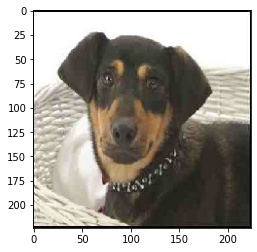

In [50]:
import matplotlib.pyplot as plt
plt.imshow(sample_image)

In [51]:
# processing the data
import tensorflow as tf
import numpy as np
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image = np.expand_dims(sample_image, axis = 0)

sample_image.shape

(1, 224, 224, 3)

In [52]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)
image_prediction = model.predict(sample_image)

In [53]:
image_prediction

array([[1.8058458e-17, 1.0000000e+00]], dtype=float32)